In [1]:
#import all the necessary packages here

import numpy as np

import csv

import pandas as pd

import warnings

import sklearn

import os

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

import statsmodels.api as sm
from scipy import stats

warnings.simplefilter('ignore')

In [127]:
#Change the directory to the folder where you have all the raw data

os.chdir(r"C:\Users\Shilp\Documents\Shilpa\Shilpa MSBA\Semester 1\Programming for Analytics [CIS 9650]\Final Group Project")

In [167]:
# Import daily level US - State dataset with TAVG, TMAX, TMIN, PRCP, SNOW variables
us_state_master_v1 = pd.read_csv("data_2010_2019.csv", sep=",", error_bad_lines = False)
us_state_master_v2 = pd.read_csv("data_2000_2009.csv", sep=",", error_bad_lines = False)
us_state_master = us_state_master_v1.append(us_state_master_v2, ignore_index=True)
us_state_master.head()

,State,date,metric_name,metric_value
0,AK,20200101,PRCP,59.407895
1,AK,20200101,SNOW,48.717949
2,AK,20200101,TAVG,-161.350319
3,AK,20200101,TMAX,-94.241935
4,AK,20200101,TMIN,-171.959677


In [168]:
us_state_master_pivot = pd.pivot_table(us_state_master, values ='metric_value', index =['State','date'], columns =['metric_name']) 

In [169]:
us_state_master_pivot.reset_index(inplace=True)
us_state_master_pivot['date'] = us_state_master_pivot['date'].astype(int)
us_state_master_pivot.head()

metric_name,State,date,PRCP,SNOW,TAVG,TMAX,TMIN
0,AK,20000101,3.772727,2.168142,-23.055556,-239.839779,-301.219780
1,AK,20000102,3.525974,2.743363,-274.610390,-235.976471,-301.725146
2,AK,20000103,16.163399,10.973214,24.976471,-211.955307,-275.744444
3,AK,20000104,18.701987,21.194690,19.840909,-197.032967,-263.373626
4,AK,20000105,17.359477,20.157895,38.241379,-183.978142,-258.961749


In [170]:
us_state_master_pivot['Year'] = us_state_master_pivot['date'].astype(str).str[0:4]

In [171]:
us_state_master_pivot_LT2010 = us_state_master_pivot[us_state_master_pivot.Year.isin(['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009'])]

In [172]:
us_state_master_pivot_LT2010.head() 

metric_name,State,date,PRCP,SNOW,TAVG,TMAX,TMIN,Year
0,AK,20000101,3.772727,2.168142,-23.055556,-239.839779,-301.219780,2000
1,AK,20000102,3.525974,2.743363,-274.610390,-235.976471,-301.725146,2000
2,AK,20000103,16.163399,10.973214,24.976471,-211.955307,-275.744444,2000
3,AK,20000104,18.701987,21.194690,19.840909,-197.032967,-263.373626,2000
4,AK,20000105,17.359477,20.157895,38.241379,-183.978142,-258.961749,2000


In [173]:
segmentation_LT2010 = us_state_master_pivot_LT2010.groupby('State').agg(
PRCP_AVG_old=('PRCP',np.mean),SNOW_AVG_old=('SNOW',np.mean),TAVG_AVG_old=('TAVG',np.mean),TMAX_AVG_old=('TMAX',np.mean),TMIN_AVG_old=('TMIN',np.mean),
PRCP_MAX_old=('PRCP',np.max),SNOW_MAX_old=('SNOW',np.max),TAVG_MAX_old=('TAVG',np.max),TMAX_MAX_old=('TMAX',np.max),TMIN_MAX_old=('TMIN',np.max),
PRCP_MIN_old=('PRCP',np.min),SNOW_MIN_old=('SNOW',np.min),TAVG_MIN_old=('TAVG',np.min),TMAX_MIN_old=('TMAX',np.min),TMIN_MIN_old=('TMIN',np.min),
PRCP_CNT_old=('PRCP',np.count_nonzero),SNOW_CNT_old=('SNOW',np.count_nonzero)).reset_index()

In [174]:
# Understanding the data
segmentation_LT2010
#.fillna(us_state_master_pivot_v2.mean()).reset_index()

,State,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,TMIN_MAX_old,PRCP_MIN_old,SNOW_MIN_old,TAVG_MIN_old,TMAX_MIN_old,TMIN_MIN_old,PRCP_CNT_old,SNOW_CNT_old
0,AK,27.871682,6.071717,2.198398,46.092208,-46.634831,201.355556,75.463636,366.025862,266.930041,119.706122,0.000000,0.000000,-300.651515,-248.352273,-308.416667,3652.0,2368.0
1,AL,39.202887,0.020449,173.833059,238.341732,110.614394,626.192982,12.629032,308.333333,387.617977,238.457831,0.000000,0.000000,-51.266667,3.900000,-125.160494,3349.0,68.0
2,AR,36.159019,0.223889,157.440696,221.698684,100.974278,811.743056,144.796748,315.214286,407.945652,243.362637,0.000000,0.000000,-80.000000,-28.659341,-123.465116,3279.0,237.0
3,AZ,9.117759,0.600759,132.437733,235.173411,77.972011,347.283784,64.389313,565.253012,469.752577,319.487562,0.000000,0.000000,-76.226667,25.886598,-122.225641,3095.0,715.0
4,CA,16.747755,0.976810,130.527012,212.021819,72.129637,416.300562,31.962329,290.009967,384.083026,216.290503,0.000000,0.000000,-40.372881,41.620000,-79.604052,3469.0,1055.0
5,CO,13.317385,4.281294,47.410052,145.456092,-6.199542,314.379791,312.505110,325.612903,409.958333,209.805643,0.000000,0.000000,-190.638158,-101.167683,-245.113846,3651.0,1996.0
6,CT,36.183093,3.115642,100.283554,151.115233,40.325585,798.470588,235.333333,300.000000,355.833333,229.538462,0.000000,0.000000,-163.000000,-125.538461,-217.923077,2772.0,589.0
7,DC,39.098063,0.895568,NaN,NaN,NaN,1476.000000,170.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,340.0,118.0
8,DE,33.591835,1.021878,136.178476,188.325422,84.823227,1027.000000,321.500000,600.000000,365.600000,264.600000,0.000000,0.000000,-102.000000,-57.500000,-148.800000,1876.0,127.0
9,FL,37.215554,0.031174,219.433312,277.746410,167.530072,536.940476,4.272727,302.357143,356.435897,257.483333,0.000000,0.000000,34.928571,108.177419,-25.109244,3560.0,39.0


In [175]:
segmentation_LT2010['PRCP_CHG_old'] = segmentation_LT2010['PRCP_MAX_old'] - segmentation_LT2010['PRCP_MIN_old']
segmentation_LT2010['SNOW_CHG_old'] = segmentation_LT2010['SNOW_MAX_old'] - segmentation_LT2010['SNOW_MIN_old']
segmentation_LT2010['TMAX_CHG_old'] = segmentation_LT2010['TMAX_MAX_old'] - segmentation_LT2010['TMAX_MIN_old']
segmentation_LT2010['TMIN_CHG_old'] = segmentation_LT2010['TMIN_MAX_old'] - segmentation_LT2010['TMIN_MIN_old']
segmentation_LT2010['TAVG_CHG_old'] = segmentation_LT2010['TAVG_MAX_old'] - segmentation_LT2010['TAVG_MIN_old']


In [176]:
us_state_master_pivot_GT2010 = us_state_master_pivot[us_state_master_pivot.Year.isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'])]
segmentation_GT2010 = us_state_master_pivot_GT2010.groupby('State').agg(
PRCP_AVG=('PRCP',np.mean),SNOW_AVG=('SNOW',np.mean),TAVG_AVG=('TAVG',np.mean),TMAX_AVG=('TMAX',np.mean),TMIN_AVG=('TMIN',np.mean),
PRCP_MAX=('PRCP',np.max),SNOW_MAX=('SNOW',np.max),TAVG_MAX=('TAVG',np.max),TMAX_MAX=('TMAX',np.max),TMIN_MAX=('TMIN',np.max),
PRCP_MIN=('PRCP',np.min),SNOW_MIN=('SNOW',np.min),TAVG_MIN=('TAVG',np.min),TMAX_MIN=('TMAX',np.min),TMIN_MIN=('TMIN',np.min)    
,PRCP_CNT=('PRCP',np.count_nonzero),SNOW_CNT=('SNOW',np.count_nonzero)).reset_index()
#Dropping DC as it does not have sufficient data
i = segmentation_GT2010[((segmentation_GT2010.State == 'DC'))].index
segmentation_GT2010 = segmentation_GT2010.drop(i)

segmentation_GT2010['PRCP_CHG'] = segmentation_GT2010['PRCP_MAX'] - segmentation_GT2010['PRCP_MIN']
segmentation_GT2010['SNOW_CHG'] = segmentation_GT2010['SNOW_MAX'] - segmentation_GT2010['SNOW_MIN']
segmentation_GT2010['TMAX_CHG'] = segmentation_GT2010['TMAX_MAX'] - segmentation_GT2010['TMAX_MIN']
segmentation_GT2010['TMIN_CHG'] = segmentation_GT2010['TMIN_MAX'] - segmentation_GT2010['TMIN_MIN']
segmentation_GT2010['TAVG_CHG'] = segmentation_GT2010['TAVG_MAX'] - segmentation_GT2010['TAVG_MIN']


In [177]:
segmentation_merge = pd.merge(segmentation_LT2010, segmentation_GT2010[['State','PRCP_AVG','SNOW_AVG','TAVG_AVG','TMAX_AVG','TMIN_AVG','PRCP_MAX','SNOW_MAX','TAVG_MAX','TMAX_MAX','TMIN_MAX','PRCP_MIN','SNOW_MIN','TAVG_MIN','TMAX_MIN','TMIN_MIN','PRCP_CHG','SNOW_CHG','TMAX_CHG','TMIN_CHG','TAVG_CHG','PRCP_CNT','SNOW_CNT']], on="State", how="left")

In [178]:
segmentation_merge.head()

,State,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,...,TAVG_MIN,TMAX_MIN,TMIN_MIN,PRCP_CHG,SNOW_CHG,TMAX_CHG,TMIN_CHG,TAVG_CHG,PRCP_CNT,SNOW_CNT
0,AK,27.871682,6.071717,2.198398,46.092208,-46.634831,201.355556,75.463636,366.025862,266.930041,...,-283.756098,-230.381147,-308.668050,230.011905,82.446429,498.350496,429.162258,487.543976,3650.0,2132.0
1,AL,39.202887,0.020449,173.833059,238.341732,110.614394,626.192982,12.629032,308.333333,387.617977,...,-76.000000,-18.464286,-128.144578,738.452830,127.197368,399.393698,370.722356,383.200000,3476.0,111.0
2,AR,36.159019,0.223889,157.440696,221.698684,100.974278,811.743056,144.796748,315.214286,407.945652,...,-131.800000,-52.033708,-153.865169,950.951219,119.000000,466.518244,418.763128,471.633333,3342.0,243.0
3,AZ,9.117759,0.600759,132.437733,235.173411,77.972011,347.283784,64.389313,565.253012,469.752577,...,-115.182927,-3.287958,-141.446700,353.865385,192.042253,396.858610,352.973530,393.496180,2979.0,674.0
4,CA,16.747755,0.976810,130.527012,212.021819,72.129637,416.300562,31.962329,290.009967,384.083026,...,-45.299625,44.462963,-75.177515,420.116788,112.098039,328.640696,278.039303,323.573007,3561.0,1015.0


In [228]:
segmentation_merge['PRCP_max_yoy'] = segmentation_merge['PRCP_MAX'] - segmentation_merge['PRCP_MAX_old']
segmentation_merge['SNOW_max_yoy'] = segmentation_merge['SNOW_MAX'] - segmentation_merge['SNOW_MAX_old']
segmentation_merge['TMAX_max_yoy'] = segmentation_merge['TMAX_MAX'] - segmentation_merge['TMAX_MAX_old']
segmentation_merge['TMIN_max_yoy'] = segmentation_merge['TMIN_MAX'] - segmentation_merge['TMIN_MAX_old']
segmentation_merge['TAVG_max_yoy'] = segmentation_merge['TAVG_MAX'] - segmentation_merge['TAVG_MAX_old']

segmentation_merge['TAVG_avg_yoy'] = segmentation_merge['TAVG_AVG'] - segmentation_merge['TAVG_AVG_old']
segmentation_merge['TMIN_avg_yoy'] = segmentation_merge['TMIN_AVG'] - segmentation_merge['TMIN_AVG_old']
segmentation_merge['TMAX_avg_yoy'] = segmentation_merge['TMAX_AVG'] - segmentation_merge['TMAX_AVG_old']


segmentation_merge['PRCP_min_yoy'] = segmentation_merge['PRCP_MIN'] - segmentation_merge['PRCP_MIN_old']
segmentation_merge['SNOW_min_yoy'] = segmentation_merge['SNOW_MIN'] - segmentation_merge['SNOW_MIN_old']
segmentation_merge['TMAX_min_yoy'] = segmentation_merge['TMAX_MIN'] - segmentation_merge['TMAX_MIN_old']
segmentation_merge['TMIN_min_yoy'] = segmentation_merge['TMIN_MIN'] - segmentation_merge['TMIN_MIN_old']
segmentation_merge['TAVG_min_yoy'] = segmentation_merge['TAVG_MIN'] - segmentation_merge['TAVG_MIN_old']

segmentation_merge['PRCP_CNT_yoy'] = segmentation_merge['PRCP_CNT'] - segmentation_merge['PRCP_CNT_old']
segmentation_merge['SNOW_CNT_yoy'] = segmentation_merge['SNOW_CNT'] - segmentation_merge['SNOW_CNT_old']

segmentation_merge['PRCP_CHG_yoy'] = segmentation_merge['PRCP_CHG'] - segmentation_merge['PRCP_CHG_old']
segmentation_merge['SNOW_CHG_yoy'] = segmentation_merge['SNOW_CHG'] - segmentation_merge['SNOW_CHG_old']
segmentation_merge['TMAX_CHG_yoy'] = segmentation_merge['TMAX_CHG'] - segmentation_merge['TMAX_CHG_old']
segmentation_merge['TMIN_CHG_yoy'] = segmentation_merge['TMIN_CHG'] - segmentation_merge['TMIN_CHG_old']
segmentation_merge['TAVG_CHG_yoy'] = segmentation_merge['TAVG_CHG'] - segmentation_merge['TAVG_CHG_old']

In [229]:
segmentation_merge.head()

,State,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,...,SNOW_CNT_yoy,PRCP_CHG_yoy,SNOW_CHG_yoy,TMAX_CHG_yoy,TMIN_CHG_yoy,TAVG_CHG_yoy,Cluster,TAVG_avg_yoy,TMIN_avg_yoy,TMAX_avg_yoy
0,AK,27.871682,6.071717,2.198398,46.092208,-46.634831,201.355556,75.463636,366.025862,266.930041,...,-236.0,28.656349,6.982792,-16.931818,1.039469,-179.133401,0,-8.812444,4.866025,-0.455358
1,AL,39.202887,0.020449,173.833059,238.341732,110.614394,626.192982,12.629032,308.333333,387.617977,...,43.0,112.259848,114.568336,15.675720,7.104031,23.600000,1,3.824617,4.791129,2.657868
2,AR,36.159019,0.223889,157.440696,221.698684,100.974278,811.743056,144.796748,315.214286,407.945652,...,6.0,139.208164,-25.796748,29.913251,51.935374,76.419048,3,-1.701276,1.994607,1.238232
3,AZ,9.117759,0.600759,132.437733,235.173411,77.972011,347.283784,64.389313,565.253012,469.752577,...,-41.0,6.581601,127.652941,-47.007369,-88.739673,-247.983499,0,-7.557241,-3.693611,-7.145350
4,CA,16.747755,0.976810,130.527012,212.021819,72.129637,416.300562,31.962329,290.009967,384.083026,...,-40.0,3.816227,80.135710,-13.822330,-17.855251,-6.809841,0,-0.246755,5.212823,0.622338


In [230]:
segmentation_merge = segmentation_merge.fillna(segmentation_merge.mean())
segmentation_merge_v2  = segmentation_merge.drop(columns =['State'])
segmentation_merge_v2.head()

,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,TMIN_MAX_old,...,SNOW_CNT_yoy,PRCP_CHG_yoy,SNOW_CHG_yoy,TMAX_CHG_yoy,TMIN_CHG_yoy,TAVG_CHG_yoy,Cluster,TAVG_avg_yoy,TMIN_avg_yoy,TMAX_avg_yoy
0,27.871682,6.071717,2.198398,46.092208,-46.634831,201.355556,75.463636,366.025862,266.930041,119.706122,...,-236.0,28.656349,6.982792,-16.931818,1.039469,-179.133401,0,-8.812444,4.866025,-0.455358
1,39.202887,0.020449,173.833059,238.341732,110.614394,626.192982,12.629032,308.333333,387.617977,238.457831,...,43.0,112.259848,114.568336,15.675720,7.104031,23.600000,1,3.824617,4.791129,2.657868
2,36.159019,0.223889,157.440696,221.698684,100.974278,811.743056,144.796748,315.214286,407.945652,243.362637,...,6.0,139.208164,-25.796748,29.913251,51.935374,76.419048,3,-1.701276,1.994607,1.238232
3,9.117759,0.600759,132.437733,235.173411,77.972011,347.283784,64.389313,565.253012,469.752577,319.487562,...,-41.0,6.581601,127.652941,-47.007369,-88.739673,-247.983499,0,-7.557241,-3.693611,-7.145350
4,16.747755,0.976810,130.527012,212.021819,72.129637,416.300562,31.962329,290.009967,384.083026,216.290503,...,-40.0,3.816227,80.135710,-13.822330,-17.855251,-6.809841,0,-0.246755,5.212823,0.622338


In [254]:
cols_of_interest = ['PRCP_MAX','SNOW_MAX','TAVG_avg_yoy','TMAX_max_yoy','TMAX_avg_yoy','TMIN_min_yoy']
data = segmentation_merge_v2[cols_of_interest]
data.head()

,PRCP_MAX,SNOW_MAX,TAVG_avg_yoy,TMAX_max_yoy,TMAX_avg_yoy,TMIN_min_yoy
0,230.011905,82.446429,-8.812444,1.039307,-0.455358,-0.251383
1,738.452830,127.197368,3.824617,-6.688566,2.657868,-2.984084
2,950.951219,119.000000,-1.701276,6.538884,1.238232,-30.400052
3,353.865385,192.042253,-7.557241,-76.181925,-7.145350,-19.221059
4,420.116788,112.098039,-0.246755,-10.979367,0.622338,4.426537


In [255]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X = StandardScaler().fit_transform(data)

In [256]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=4, max_iter = 1000, random_state=4242)
#Run the clustering algorithm
model = k_means.fit(X)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)

In [257]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

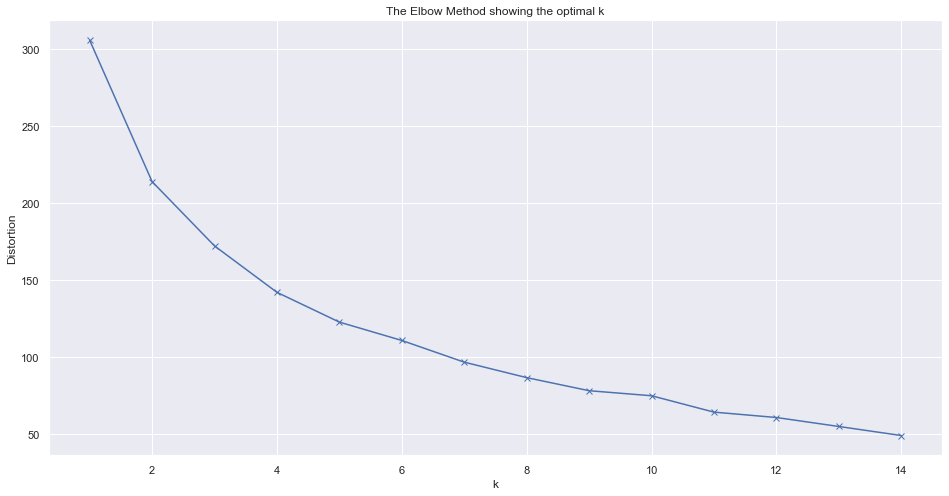

In [258]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [259]:
segmentation_merge['Cluster'] = pd.Series(y_hat)

In [260]:
segmentation_merge

,State,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,...,SNOW_CNT_yoy,PRCP_CHG_yoy,SNOW_CHG_yoy,TMAX_CHG_yoy,TMIN_CHG_yoy,TAVG_CHG_yoy,Cluster,TAVG_avg_yoy,TMIN_avg_yoy,TMAX_avg_yoy
0,AK,27.871682,6.071717,2.198398,46.092208,-46.634831,201.355556,75.463636,366.025862,266.930041,...,-236.0,28.656349,6.982792,-16.931818,1.039469,-179.133401,1,-8.812444,4.866025,-0.455358
1,AL,39.202887,0.020449,173.833059,238.341732,110.614394,626.192982,12.629032,308.333333,387.617977,...,43.0,112.259848,114.568336,15.675720,7.104031,23.600000,3,3.824617,4.791129,2.657868
2,AR,36.159019,0.223889,157.440696,221.698684,100.974278,811.743056,144.796748,315.214286,407.945652,...,6.0,139.208164,-25.796748,29.913251,51.935374,76.419048,3,-1.701276,1.994607,1.238232
3,AZ,9.117759,0.600759,132.437733,235.173411,77.972011,347.283784,64.389313,565.253012,469.752577,...,-41.0,6.581601,127.652941,-47.007369,-88.739673,-247.983499,2,-7.557241,-3.693611,-7.145350
4,CA,16.747755,0.976810,130.527012,212.021819,72.129637,416.300562,31.962329,290.009967,384.083026,...,-40.0,3.816227,80.135710,-13.822330,-17.855251,-6.809841,1,-0.246755,5.212823,0.622338
5,CO,13.317385,4.281294,47.410052,145.456092,-6.199542,314.379791,312.505110,325.612903,409.958333,...,-72.0,4.106894,-112.946827,-39.552137,26.053963,24.310818,2,-4.391780,-1.055943,-5.193126
6,CT,36.183093,3.115642,100.283554,151.115233,40.325585,798.470588,235.333333,300.000000,355.833333,...,1.0,337.529412,399.140351,-6.046795,30.450226,-11.866325,0,12.073164,4.993485,5.615575
7,DC,39.098063,0.895568,110.583957,175.478670,52.735224,1476.000000,170.000000,321.893276,370.051121,...,774.6,-798.914451,23.696494,9.443067,10.256164,-19.752475,3,1.772761,2.780619,0.145165
8,DE,33.591835,1.021878,136.178476,188.325422,84.823227,1027.000000,321.500000,600.000000,365.600000,...,132.0,658.300000,70.264706,50.900000,49.266667,-241.000000,0,0.076572,6.265012,4.683865
9,FL,37.215554,0.031174,219.433312,277.746410,167.530072,536.940476,4.272727,302.357143,356.435897,...,-32.0,923.104468,-3.939394,38.333402,5.891597,15.554945,3,-1.477674,7.932921,3.866900


In [261]:
segmentation_merge_summary = segmentation_merge.groupby('Cluster').mean()

In [262]:
segmentation_merge_summary

,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,TMIN_MAX_old,...,PRCP_CNT_yoy,SNOW_CNT_yoy,PRCP_CHG_yoy,SNOW_CHG_yoy,TMAX_CHG_yoy,TMIN_CHG_yoy,TAVG_CHG_yoy,TAVG_avg_yoy,TMIN_avg_yoy,TMAX_avg_yoy
Cluster,,,,,,,,,,,,,,,,,,,,,
0,33.809965,3.882025,101.693514,151.167025,40.651875,772.602922,326.215530,351.990556,351.841991,232.408767,...,115.000000,13.000000,297.759351,96.620858,2.082597,8.658753,-65.980581,6.931966,4.824514,3.623167
1,18.592808,2.975438,62.020533,137.570409,9.317256,332.595591,104.626634,306.335638,358.831722,204.934238,...,33.928571,-34.928571,-4.447420,21.293402,-8.254765,-0.822558,-36.447291,-3.097327,1.967076,-3.295925
2,10.907070,2.099049,80.280020,194.241930,38.178458,285.104020,167.237052,363.970457,457.870304,315.173684,...,-62.333333,-65.333333,21.270251,0.852460,-48.747755,-16.787146,-45.869886,-3.693121,-4.317769,-5.964082
3,32.502512,0.924395,146.404965,205.376267,84.916697,667.947122,110.270822,313.168383,373.205510,237.387723,...,167.652500,-9.183333,95.159785,30.671478,30.107517,20.764753,12.512554,3.147212,3.290860,1.466956


In [263]:
segmentation_merge.groupby('Cluster').count()

,State,PRCP_AVG_old,SNOW_AVG_old,TAVG_AVG_old,TMAX_AVG_old,TMIN_AVG_old,PRCP_MAX_old,SNOW_MAX_old,TAVG_MAX_old,TMAX_MAX_old,...,PRCP_CNT_yoy,SNOW_CNT_yoy,PRCP_CHG_yoy,SNOW_CHG_yoy,TMAX_CHG_yoy,TMIN_CHG_yoy,TAVG_CHG_yoy,TAVG_avg_yoy,TMIN_avg_yoy,TMAX_avg_yoy
Cluster,,,,,,,,,,,,,,,,,,,,,
0,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
1,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24


In [264]:
segmentation_merge.to_csv(r'C:\Users\Shilp\Documents\Shilpa\Shilpa MSBA\Semester 1\Programming for Analytics [CIS 9650]\Final Group Project\Raw data\December 5\Segmentation\Revised\revised_cluster_results_final_v2.csv') 
segmentation_merge_summary.to_csv(r'C:\Users\Shilp\Documents\Shilpa\Shilpa MSBA\Semester 1\Programming for Analytics [CIS 9650]\Final Group Project\Raw data\December 5\Segmentation\Revised\revised_summary_results_final_v2.csv') 